# Graph Attention Networks (GAT)

##### Author information
- Name: Hyeonsoo Seong
- email address: 21800379@handong.ac.kr
- GitHub: HyeonsooSeong
- Youtube URL: https://youtube.com/@hyeonsoo0312

-------------   
#### Part 1. Brief background of methodology
Graph Neural Networks (GNN) is a type of Neural Network which directly operates on the Graph structure.

Various techniques have been introduced based on the concept of GNNs, and the methodology we will focus on today is Graph Attention Networks (GAT).


##### Reasons for introducing GAT
To improve performance, feature updates should reflect the importance of nodes.
Attention mechanism is introduced as a suitable technique to improve this.

![ex_screenshot](./fig1.png)


When features are aggregated in each layer, the same weights and bias are aggregated. However, with attention, different weights are applied to each node to improve discriminative power.



##### Applications
1. Recommendation Systems

In recommendation systems, GAT can be used to model relationships between users and items as a graph. Each node represents a user or an item, and the edges represent interactions, such as purchases or ratings. GAT can leverage attention mechanisms to learn the importance of interactions between users and items, allowing it to make more accurate recommendations by focusing on the most relevant interactions.

2. Drug Discovery

In drug discovery, molecules can be represented as graphs where atoms are nodes and chemical bonds are edges. GAT can be used to predict molecular properties by learning atom-level interactions and how they contribute to the overall molecular behavior. By leveraging attention, GAT can focus on the most critical parts of a molecule for predicting properties like toxicity, binding affinity, or drug efficacy, which helps accelerate drug discovery.

3. 3D Model Processing

In 3D model processing, GAT can be applied to point clouds or meshes where nodes represent points or vertices, and edges represent connections or relationships between them. GAT can learn to understand the geometric structure of 3D objects, which is useful for tasks like shape classification, segmentation, or object recognition. The attention mechanism allows GAT to prioritize the most relevant parts of a 3D object, improving the accuracy of geometric understanding.     

-------------

#### Part 2. Key concept of methodology
##### Introduction about Graph Neural Netwoks (GNN)
A graph is a data structure composed of nodes(vertices) and edges. Nodes represent individual objects, and edges represent connections between them. Edges can be directed or just used for links. 

![ex_screenshot](./fig2.png)

The graph is then constructed with information about the features representing each node.
This is where the concept of Adjacency Matrix comes in.    
    
Adjacency Matrix is a matrix that shows the connectivity of each node and indicates whether each node is connected through an edge.    
'1' indicates connected and '0' indicates not connected, and in the case of Directed Edge, '1' indicates the node that the node points to and '0' indicates the node that the node does not point to based on the row. And the node that is connected is called 'Neighborhood node'.    
In the case of connection, it depends on the characteristics of the data, such as a subway line is automatically determined as 'connected' if the connection between adjacent stations or the follow status on a social network is set to edge. However, in some cases, researchers (users) may need to specify connections in an arbitrary way, such as cosine similarity or distance-based.

The process of moving these data into Euclidean space and vectorizing them so that they can be represented in a graph so that they have positional meaning is called 'node embedding'.
Let's take a quick look at embedding through 'Message Passing', the most representative example of node embedding.   
First, we vectorize the features of each node. This is called a feature vector. 
We update the features of each node by reflecting the features of neighboring nodes through the Adjacency Matrix. A neural network is used in this process.

![ex_screenshot](./fig3.png)

This figure shows the feature update of a node named A. The features of A's neighboring nodes are aggregated, and the weight and bias of the layer are applied to the aggregated value. Then, the value is passed through the activation function to update the features of node A. All nodes including A go through the process. The neighboring nodes in the second layer are also affected by the features of their neighbors and update their features. The structure of the neural network allows this process to happen in parallel and simultaneously. (they affect each other at the same time, not sequentially)
The formula looks like this     
     
$${h_u{}}^{k+1}=UPDATE^k({h_u{}}^{k},AGGREGATE^k({{h_v{}}^{k},\forall_v\in N(u)})) $$
      
Here we can see the problem that weights and bias are applied equally to nodes in the same layer.
Even if they are linked, the importance of each node may be different, but this is not reflected.   

-----------------    
#### Graph Attention Netwoks (GAT)
Graph Attention Networks (GAT) with an Attention mechanism was introduced to compensate for the above problems.   
It is a technique that shows improved performance by weighting each node differently.   
   
##### Attention
Attention mechanism is a concept that first appeared in the field of NLP. It is a mechanism designed to assign different importance to different words in a sentence because they have different effects on the meaning of the sentence, and to give weight (Attention Score) to important factors.   
Attention Score is assigned to each element by evaluating the relationship through the interaction of input data.   

$$\alpha_{ij} = \text{softmax}\left( \frac{q_i^T k_j}{\sqrt{d_k}} \right)$$



##### Application at GNN
The problem with the existing GNN is that the same weight and bias are applied to the features of all neighborhood nodes, which does not reflect the difference in importance between neighborhood nodes.
GAT is a technique designed to learn the importance of the relationship between each neighborhood node by introducing an attention mechanism, so that it receives more influence from more important neighborhood nodes.

![ex_screenshot](./fig4.png)

In general, it works as follows
1. calculate Attention score based on the relationship between Neighborhood nodes
2. normalization using Softmax
3. update the feature vector of the node      

Let's take a look at each one in turn.     
     
              
1) calculate Attention score based on the relationship between Neighborhood nodes

$$e_{ij} = \text{LeakyReLU}(a^T [W h_i \| W h_j])$$

e_ij : attention score between node i and node j
W : Weight Matrix
a : Attention score vector
Attention Score is learned through the LeakyReLU function. You can use other activation functions, but LeakyReLU is used mainly because it is recognized for its performance.

2) Normalize Attention Score using Softmax

$$\alpha_{ij} = \frac{\exp(e_{ij})}{\sum_{k \in \mathcal{N}(i)} \exp(e_{ik})}$$

Use Softmax to normalize the relative importance of each neighborhood node like a probability.

3) update the feature vector of node by weighting the features of each neighborhood node based on the normalized Attention Score

$$h_i^{(l+1)} = \sigma\left( \sum_{j \in \mathcal{N}(i)} \alpha_{ij} W h_j^{(l)} \right)$$

Update the feature vector of a node by weighting the features of each neighboring node based on the normalized Attention Score.

Through the Attention mechanism, GNN can better reflect the relationship between nodes, and it has the advantage of being able to learn more complex relationship structures.    
     
     
---------------   
     

#### Part 3. Example

##### Amazon Computers Dataset Description

The Amazon Computers dataset is a graph dataset generated based on co-purchase information between products on Amazon. This dataset models the relationships between products as a graph, making it useful for various machine learning and deep learning tasks.     

##### Data Structure

- Nodes: Each node represents a product listed on Amazon.
- Edges: Each edge represents a co-purchase relationship between two products. If two products have been purchased together, an edge is formed between them.   
- Feature Vectors: 
    - Each product node has a feature vector, which is a Bag-of-Words (BoW) representation derived from product reviews. This means each node’s feature vector is based on the frequency of words that appear in reviews of the product.    
    - These feature vectors contain text-based information about the product, helping the model learn patterns from reviews.     

##### Labels

- Each product is associated with a category label. This label indicates which category the product belongs to, and the goal of the model is to predict the product’s category based on its features and relationships.     
     
##### Modeling Objective

- The primary goal with this dataset is to learn both the relationships between products and the information from their reviews to predict the category of each product.
- Graph-based models such as GNN (Graph Neural Network) can be utilized to learn these relationships, while GAT (Graph Attention Network), in particular, can selectively learn important interactions between nodes, leading to improved performance.


Number of nodes: 13752
Number of edges: 491722
Feature shape: torch.Size([13752, 767])
Label shape: torch.Size([13752])


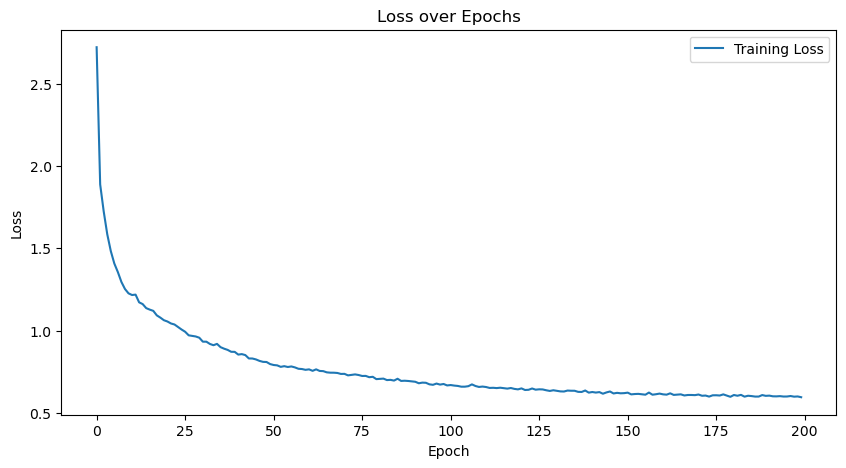

Test accuracy: 0.9109
Test precision: 0.8986
Test recall: 0.9218
Test F1 score: 0.9093


In [3]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.datasets import Amazon
from sklearn.metrics import precision_score, recall_score, f1_score
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt

dataset = Amazon(root="./tmp/", name="Computers")
graph_data = dataset[0]

print(f"Number of nodes: {graph_data.num_nodes}")
print(f"Number of edges: {graph_data.num_edges}")
print(f"Feature shape: {graph_data.x.shape}")
print(f"Label shape: {graph_data.y.shape}")

total_nodes = graph_data.num_nodes
train_set_mask = torch.zeros(total_nodes, dtype=torch.bool)
train_set_mask[:int(0.8 * total_nodes)] = True
test_set_mask = ~train_set_mask

class GATModel(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GATModel, self).__init__()
        self.gat1 = GATConv(input_dim, 128, heads=4, dropout=0.6)
        self.norm1 = torch.nn.BatchNorm1d(128 * 4)
        self.gat2 = GATConv(128 * 4, output_dim, heads=1, concat=False, dropout=0.6)
        self.norm2 = torch.nn.BatchNorm1d(output_dim)

    def forward(self, data):
        features, edges = data.x, data.edge_index
        features = self.gat1(features, edges)
        features = self.norm1(features)
        features = F.elu(features)
        features = F.dropout(features, p=0.6, training=self.training)
        features = self.gat2(features, edges)
        features = self.norm2(features)
        return F.log_softmax(features, dim=1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GATModel(dataset.num_features, dataset.num_classes).to(device)
graph_data = graph_data.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.005, weight_decay=5e-4)
scheduler = StepLR(optimizer, step_size=50, gamma=0.5)

best_loss = None
epochs_no_improve = 0
patience = 20

loss_values = []  

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    output = model(graph_data)
    loss = F.nll_loss(output[train_set_mask], graph_data.y[train_set_mask])
    loss.backward()
    optimizer.step()
    scheduler.step()
    
    loss_values.append(loss.item()) 
    

    if best_loss is None:
        best_loss = loss.item()
    elif best_loss > loss.item():
        best_loss = loss.item()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve == patience:
            print("Early stopping!")
            break

plt.figure(figsize=(10, 5))
plt.plot(loss_values, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

model.eval()
_, predictions = model(graph_data).max(dim=1)

pred_test = predictions[test_set_mask].cpu().numpy()
y_test = graph_data.y[test_set_mask].cpu().numpy()

correct_predictions = predictions[test_set_mask].eq(graph_data.y[test_set_mask]).sum().item()
accuracy = correct_predictions / test_set_mask.sum().item()

precision = precision_score(y_test, pred_test, average='macro')
recall = recall_score(y_test, pred_test, average='macro')
f1 = f1_score(y_test, pred_test, average='macro')

print(f"Test accuracy: {accuracy:.4f}")
print(f"Test precision: {precision:.4f}")
print(f"Test recall: {recall:.4f}")
print(f"Test F1 score: {f1:.4f}")


##### Interpreting Results
- Loss Value
    - The loss value starts at well above 2.5 and gradually decreases as the training progresses.
    - A steady decrease in Loss indicates that the model is learning well and is effectively learning patterns from the data. In particular, a large decrease in Loss followed by a more gradual decrease is a positive sign of good convergence.   
   
- Test accuracy: 0.9109 (about 91.09%)
- Test precision: 0.8986 (approx. 89.86%)
- Test recall: 0.9218 (approx. 92.18%)
- Test F1 score: 0.9093 (approx. 90.93%)
	
##### Overall interpretation:

- The loss reduction indicates that the model is learning well, and the performance metrics on the test data are very good.
- The Accuracy of 91.09% shows that the model is performing well, while Precision (89.86%), Recall (92.18%), and F1 Score (90.93%) all show very balanced performance.
- The model is accurately classifying nodes in the test data and is mostly predicting which nodes belong to the true category.
- These results indicate that the model has learned the data well, with adequate training without overfitting, and has very good generalization performance.